# Time Series - 1 Graded assessment

### DATA_SET:

Analytics firm wants to forecast the Price of Mindtree Ltd. stock for the month of Dec 2021. For this, firm has gathered a Closing Stock Price data for the period of Dec 2020 to Nov 2021.

* date ==			date field	
* Closing == 	    Daily Closing Price of Stock (numeric)

#### 1.	Data preparation (5 marks)


a.	Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables? (1 MARK)

b. convert the data into time series (2 MARK)


c. Check for defects in the data such as missing values, null, etc. (1 MARK)

d. Visualize the time series using relevant plots. (1 MARK)


In [1]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
df=pd.read_csv("data.csv")

In [2]:
df.head()

,Date,Closing
0,04-12-2020,1411.60
1,07-12-2020,1414.30
2,08-12-2020,1441.70
3,09-12-2020,1437.95
4,10-12-2020,1442.70


In [17]:
df.tail()

,Date,Closing
254,25-11-2021,4576.55
255,26-11-2021,4597.90
256,29-11-2021,4625.55
257,30-11-2021,4547.35
258,01-12-2021,4591.05


In [3]:
df.tail()

,Date,Closing
254,25-11-2021,4576.55
255,26-11-2021,4597.90
256,29-11-2021,4625.55
257,30-11-2021,4547.35
258,01-12-2021,4591.05


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     259 non-null    object 
 1   Closing  259 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [19]:

#CHanging the rownames as Date, daybafter day usually on Business days
from pandas.tseries.offsets import BDay
date = pd.date_range(start='12/04/2020', end='12/01/2021', freq=BDay())
date[0:263]

DatetimeIndex(['2020-12-04', '2020-12-07', '2020-12-08', '2020-12-09',
               '2020-12-10', '2020-12-11', '2020-12-14', '2020-12-15',
               '2020-12-16', '2020-12-17',
               ...
               '2021-11-18', '2021-11-19', '2021-11-22', '2021-11-23',
               '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-29',
               '2021-11-30', '2021-12-01'],
              dtype='datetime64[ns]', length=259, freq='B')

In [3]:
#Calendar day frequencies
date = pd.date_range(start='1/1/2018', end='4/10/2019', freq='D')
date

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-06', '2019-04-07', '2019-04-08',
               '2019-04-09', '2019-04-10'],
              dtype='datetime64[ns]', length=465, freq='D')

In [20]:
df['TimeStamp']=pd.DataFrame(date,columns=['date'])
df = df.set_index('TimeStamp')
df=df.drop('Date',axis=1)
df

,Closing
TimeStamp,
2020-12-04,1411.60
2020-12-07,1414.30
2020-12-08,1441.70
2020-12-09,1437.95
2020-12-10,1442.70
...,...
2021-11-25,4576.55
2021-11-26,4597.90
2021-11-29,4625.55


In [21]:
df.isnull().sum()

Closing    0
dtype: int64

<AxesSubplot:xlabel='TimeStamp'>

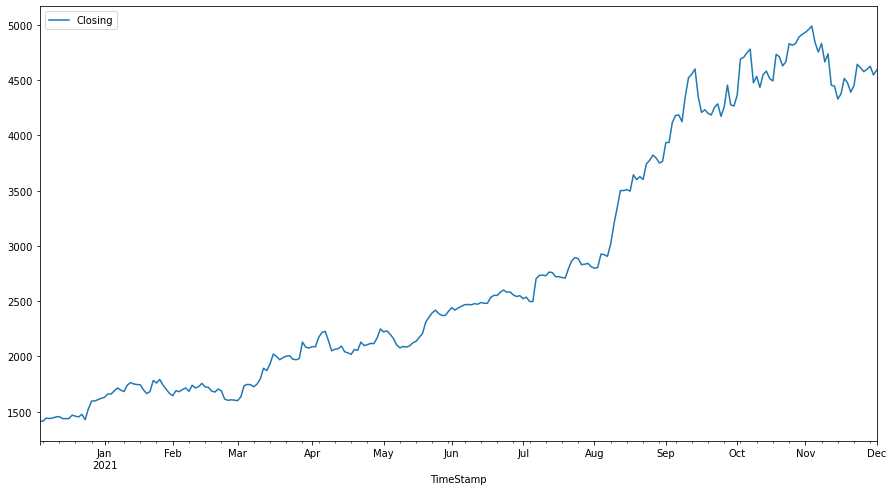

In [22]:
#data will come sequnential after converint into date time
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
df.plot()

#### 2.	Data understanding (15 marks)

a.	Decompose the time series and check for time series components. (4 marks)

b.	Perform dicky fuller test to check the stationarity? What other actions will you take if series is non-stationary?(3+1 marks)

c.	Plot AutoCorrelation and Partial AutoCorrelation function? What is your inference from these plots? (2+2 marks)

d.	Split dataset into train and test sets. Use last two month data for testing. (3 marks)



In [24]:
### a. Decompose the time series and check for time series components. (4 marks)
#Trend-how trend is going, seasonal

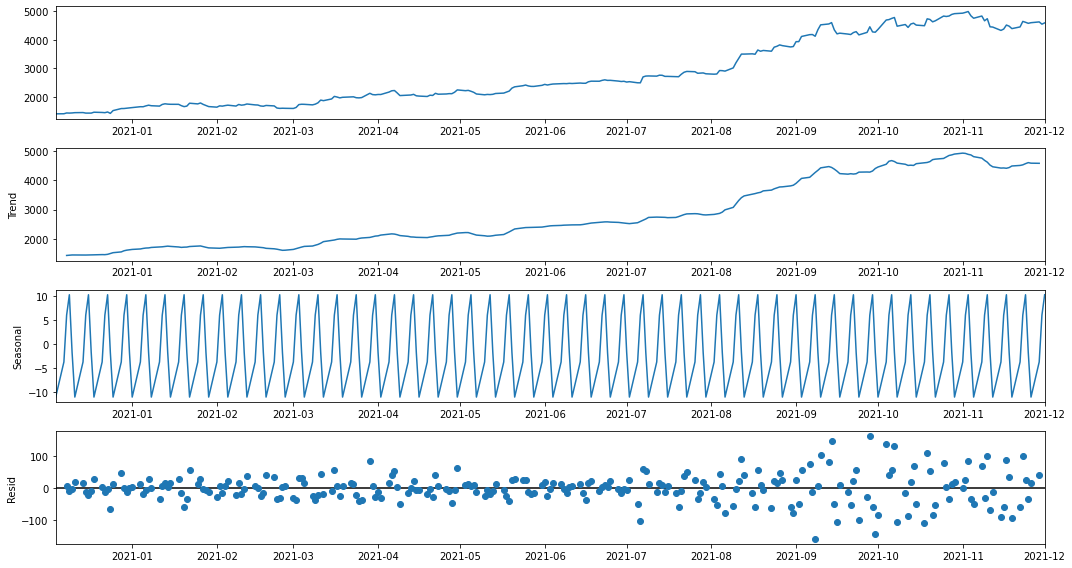

In [25]:
from statsmodels.tsa.seasonal             import  seasonal_decompose
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

In [26]:
### b. Perform dicky fuller test to check the stationarity? What other actions will you take if series is non-stationary?(3+1 marks)

In [27]:
from statsmodels.tsa.stattools            import  adfuller
observations= df.values
test_result = adfuller(observations)
test_result

(-0.007528997627653322,
 0.9579049966158177,
 0,
 258,
 {'1%': -3.455952927706342,
  '5%': -2.8728086526320302,
  '10%': -2.572774990685656},
 2770.616012349057)

In [28]:
####series is non-stationary. applying 1st order differencing

In [29]:
df_diff = df.diff(periods=1).dropna()
observations= df_diff.values
test_result = adfuller(observations)
test_result

(-15.394908823574543,
 3.272634107458135e-28,
 0,
 257,
 {'1%': -3.4560535712549925,
  '5%': -2.8728527662442334,
  '10%': -2.5727985212493754},
 2759.816026154356)

In [30]:
### c. Plot AutoCorrelation and Partial AutoCorrelation function? What is your inference from these plots? (2+2 marks)

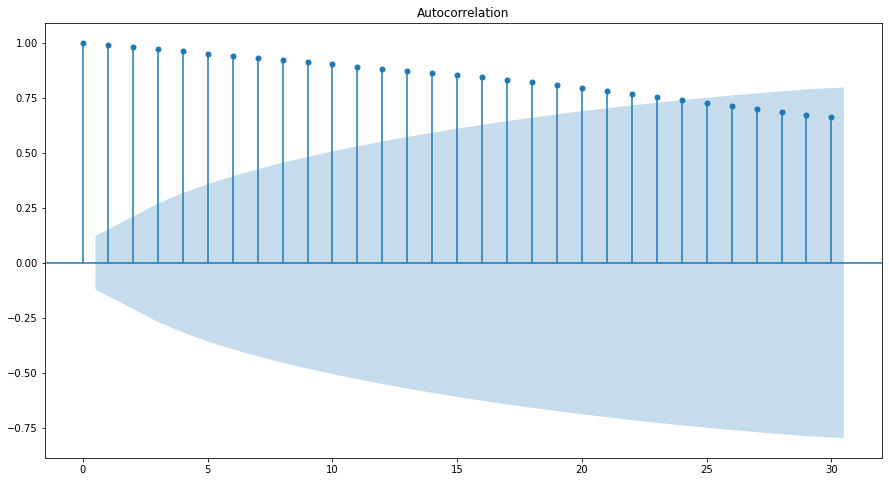

In [31]:
from statsmodels.graphics.tsaplots import  plot_acf,plot_pacf
plot_acf(df,lags=30);

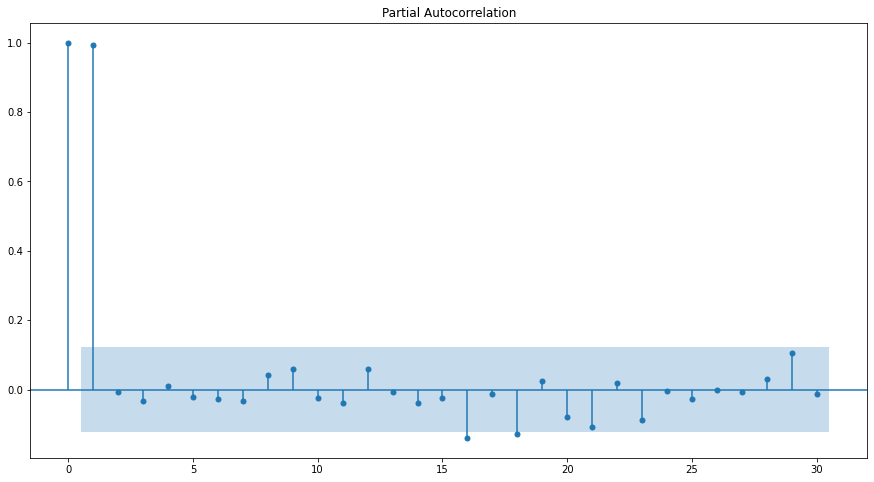

In [32]:
plot_pacf(df,lags=30);

In [33]:
##### Original series is showing AR characteristics as ACF plot is decaying slowly, while PACF is showing limited number of spikes before cut-off.

In [34]:
### d. Split dataset into train and test sets. Use last two month data for testing. (3 marks)

In [39]:
train_end=datetime(2021,9,30)
test_end=datetime(2021,12,1)
train             = df[:train_end] 
test              = df[train_end + timedelta(days=1):test_end]

In [40]:
train.shape

(215, 1)

In [41]:
test.shape

(44, 1)


### 3.	Model Building (20 marks)

a.	Fit a base model and observe the residuals, RMSE and MAPE values of the model. Please comment on whether it is good or not.  (5 marks)

c.	How would you improve the model? What changes you will make in the base model. Fit the final model.   (10 marks)

d.	Analyze the residuals of final model. Feel free to use charts or graphs to explain. (2 marks) 

e.	Forecast the Close price for next 1 months using the final model? (3 marks)


### Base Model using ARIMA

In [42]:
from statsmodels.tsa.arima_model import  ARIMA
import itertools
p = q = range(0, 4)
d= range(0,2)
pdq = list(itertools.product(p, d, q))
print('parameter combinations for the Model')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

parameter combinations for the Model
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 0, 3)
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (1, 0, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)
Model: (2, 0, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 0, 0)
Model: (3, 0, 1)
Model: (3, 0, 2)
Model: (3, 0, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [43]:
dfObj1 = pd.DataFrame(columns=['param', 'AIC'])
dfObj1

,param,AIC


In [44]:
for param in pdq:
            try:
                mod = ARIMA(train, order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj1 = dfObj1.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0) - AIC:3508.5189368805773
ARIMA(0, 0, 1) - AIC:3240.76406002742
ARIMA(0, 1, 0) - AIC:2353.5509627029696
ARIMA(0, 1, 1) - AIC:2350.9260623746322
ARIMA(0, 1, 2) - AIC:2352.637359345501


C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

ARIMA(0, 1, 3) - AIC:2354.515827900326
ARIMA(1, 0, 0) - AIC:2383.565993862076


C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

ARIMA(1, 1, 0) - AIC:2351.3727866726654
ARIMA(1, 1, 1) - AIC:2352.7193717396885


C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 2) - AIC:2354.5183888988004
ARIMA(1, 1, 3) - AIC:2352.311377655368


C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 0, 0) - AIC:2378.3102831410797
ARIMA(2, 1, 0) - AIC:2352.551808434849


C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

ARIMA(2, 1, 1) - AIC:2354.5208115970854
ARIMA(2, 1, 2) - AIC:2356.5098965963193


C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian fai

ARIMA(2, 1, 3) - AIC:2342.888192368727
ARIMA(3, 0, 0) - AIC:2380.237096776718
ARIMA(3, 1, 0) - AIC:2354.5396106209355


C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

ARIMA(3, 1, 1) - AIC:2356.5164477269277


C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


ARIMA(3, 1, 2) - AIC:2353.816102321847


C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


ARIMA(3, 1, 3) - AIC:2344.9106293665172


C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [45]:
dfObj1.sort_values(by=['AIC'])

,param,AIC
15,"(2, 1, 3)",2342.888192
20,"(3, 1, 3)",2344.910629
3,"(0, 1, 1)",2350.926062
7,"(1, 1, 0)",2351.372787
10,"(1, 1, 3)",2352.311378
12,"(2, 1, 0)",2352.551808
4,"(0, 1, 2)",2352.637359
8,"(1, 1, 1)",2352.719372
2,"(0, 1, 0)",2353.550963
19,"(3, 1, 2)",2353.816102


In [46]:
model = ARIMA(train, order=(2,1,3))
results_Arima = model.fit()
print(results_Arima.summary())

C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:              D.Closing   No. Observations:                  214
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1164.444
Method:                       css-mle   S.D. of innovations             55.149
Date:                Fri, 17 Dec 2021   AIC                           2342.888
Time:                        15:26:40   BIC                           2366.450
Sample:                    12-07-2020   HQIC                          2352.409
                         - 09-30-2021                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              13.3088      4.434      3.002      0.003       4.619      21.999
ar.L1.D.Closing    -1.7551      0.059    -29.811      0.000      -1.870      -1.640
ar.L2.D.Closing    -0.8072      

C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [47]:
ARIMA_predictions=results_Arima.forecast(len(test))

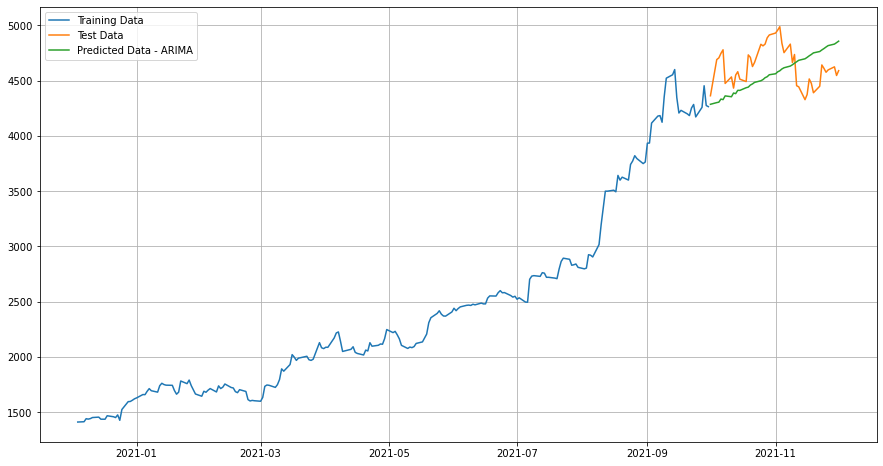

In [48]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,ARIMA_predictions[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [50]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Closing'],ARIMA_predictions[0], squared=False)
print(rmse)

268.2744645341023


In [51]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

mape=MAPE(test['Closing'].values,ARIMA_predictions[0])
print(mape)

5.235651085608899


In [52]:
### Those Model MAPE is less that 10%. Model is not capturing the trend

### Model Improvement

#### Will use Exponential Smoothing model

In [53]:
from statsmodels.tsa.api                  import  ExponentialSmoothing

model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES = model_TES.fit(optimized=True)
model_TES.summary()

C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,Closing,No. Observations:,215
Model:,ExponentialSmoothing,SSE,778342.465
Optimized:,True,AIC,1779.771
Trend:,Additive,BIC,1810.107
Seasonal:,Additive,AICC,1781.072
Seasonal Periods:,5,Date:,"Fri, 17 Dec 2021"
Box-Cox:,False,Time:,15:27:45
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9542595,alpha,True
smoothing_trend,0.0407340,beta,True


In [54]:
TES_predictions =  model_TES.forecast(len(test))

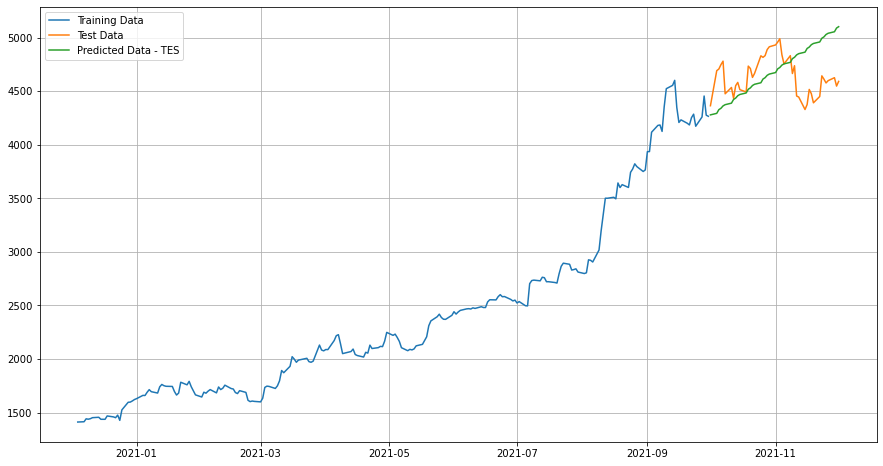

In [55]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,TES_predictions,label='Predicted Data - TES')
plt.legend(loc='best')
plt.grid();

In [57]:
rmse = mean_squared_error(test['Closing'],TES_predictions.values, squared=False)
print(rmse)

321.09503584677645


In [58]:
mape=MAPE(test['Closing'].values,TES_predictions.values)
print(mape)

5.921669668880174


#### Model Tuning

In [194]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES = model_TES.fit(smoothing_level=0.9542595,smoothing_trend=0.00607340,smoothing_seasonal=0.00158913,optimized=False)
model_TES.summary()

C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,Closing,No. Observations:,215
Model:,ExponentialSmoothing,SSE,829091.428
Optimized:,False,AIC,1793.351
Trend:,Additive,BIC,1823.687
Seasonal:,Additive,AICC,1794.652
Seasonal Periods:,5,Date:,"Fri, 17 Dec 2021"
Box-Cox:,False,Time:,15:35:20
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9542595,alpha,False
smoothing_trend,0.0060734,beta,False


In [195]:
TES_predictions =  model_TES.forecast(len(test))

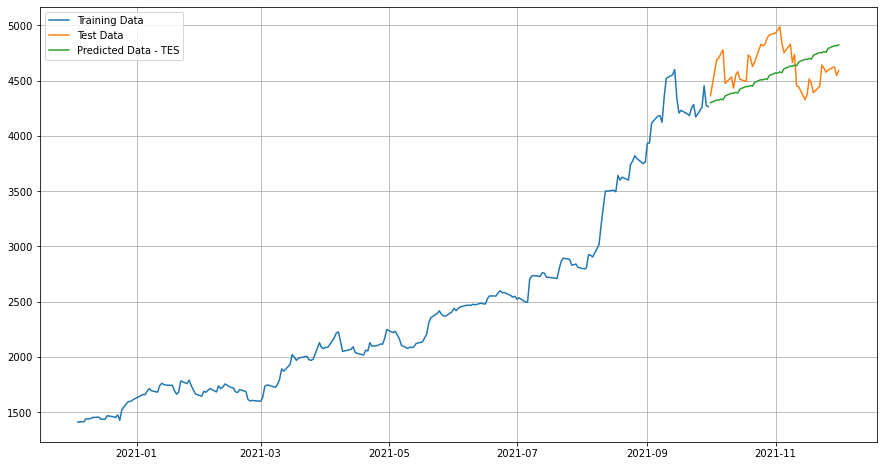

In [196]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,TES_predictions,label='Predicted Data - TES')
plt.legend(loc='best')
plt.grid();

In [197]:
rmse = mean_squared_error(test['Closing'],TES_predictions.values, squared=False)
print(rmse)

261.9470285637669


In [198]:
mape=MAPE(test['Closing'].values,TES_predictions.values)
print(mape)

5.068466004893961


### Residual Analysis

In [200]:
residuals = test['Closing'].values-TES_predictions.values

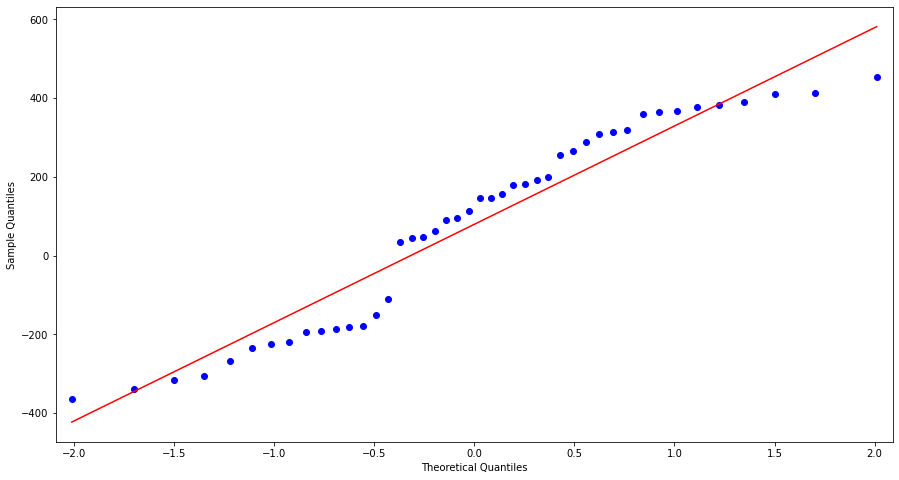

In [201]:
from statsmodels.graphics.gofplots        import  qqplot
qqplot(residuals,line="s");

In [202]:
### residual points are falling approximately along this reference line.

### Forecast Using Final Model

In [208]:
model_TES = ExponentialSmoothing(df,trend='additive',seasonal='additive',initialization_method='estimated')

C:\Users\AARAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


In [209]:
model_TES = model_TES.fit(smoothing_level=0.9542595,smoothing_trend=0.00607340,smoothing_seasonal=0.00158913,optimized=False)
model_TES.summary()

Dep. Variable:,Closing,No. Observations:,259
Model:,ExponentialSmoothing,SSE,1421276.420
Optimized:,False,AIC,2248.052
Trend:,Additive,BIC,2280.063
Seasonal:,Additive,AICC,2249.120
Seasonal Periods:,5,Date:,"Fri, 17 Dec 2021"
Box-Cox:,False,Time:,15:36:13
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9542595,alpha,False
smoothing_trend,0.0060734,beta,False


In [210]:
forecast= model_TES.forecast(30)

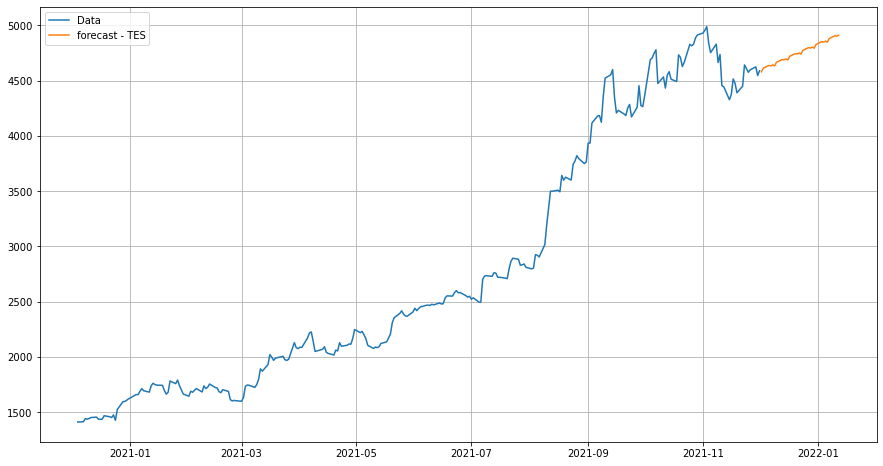

In [211]:
plt.plot(df,label='Data')
plt.plot(forecast,label='forecast - TES')
plt.legend(loc='best')
plt.grid();

#### END